This is the last part of the first example wherein we will try to intuitively explain why the data-centric approach performed better than a model-centric approach.  

### 1. Import necessary libraries
No need to install tensorflow, sklearn, etc.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### 2. Read the data

In [2]:
df1 = pd.read_csv("Ex1a.csv");

t = df1['time'].to_numpy();t=t.reshape(np.size(t),1);
y = df1['value'].to_numpy();y=y.reshape(np.size(y),1);
labels = df1['is_anom'].to_numpy();labels=labels.reshape(np.size(labels),1);
anom_ind=np.nonzero(labels)[0]

### 3. Find the first difference

In [3]:
dy=np.zeros(np.shape(y))
for i in range(1,np.size(y)):
    dy[i]=np.abs(y[i]-y[i-1])

### 4. Domain knowledge

In [4]:
# domain information
ylim=90*np.ones(np.shape(y));

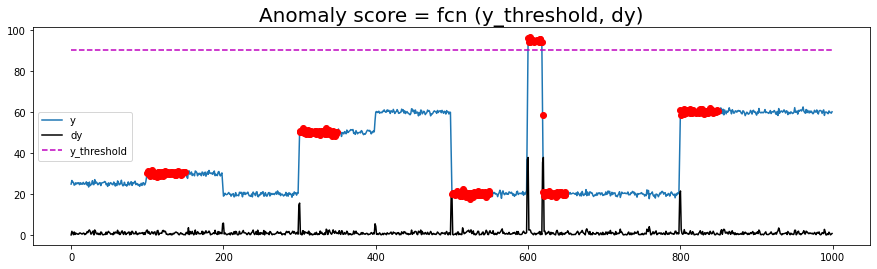

In [5]:
plt.figure(figsize=(15,4))
plt.plot(t,y,label='y');
plt.plot(t,dy,'-k',label='dy');
plt.plot(t,ylim,'--m',label='y_threshold');
plt.plot(anom_ind,y[anom_ind],'ro')
plt.title('Anomaly score = fcn (y_threshold, dy)', fontsize=20)
plt.legend()
plt.savefig('y_and_dy.jpg')
#plt.show()


### 5. Anomaly score
Raise an alarm if the value of y is high say 90%. (Domain Knowledge)
Raise an alarm if the value of dy is high. (Ignore small fluctuations)
Anomaly score  = fcn (y_threshold, dy) 
We propose a simple anomaly score given by: 𝛼 dy + 𝛽(signum(y-90)+1)/2


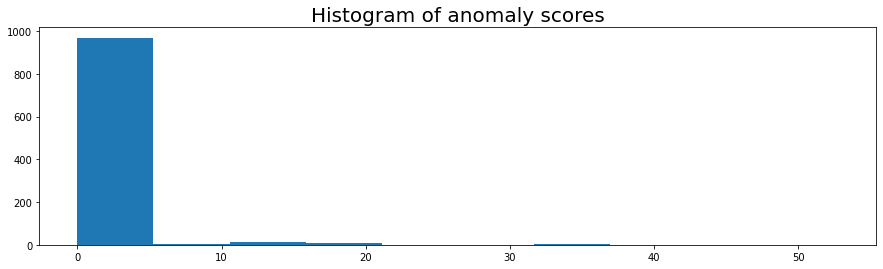

In [6]:
anom_score = dy + 15*0.5*(np.sign(y-ylim)+1);

# create histogram
plt.figure(figsize=(15,4))
hist, bin_edges = np.histogram(anom_score, density=True)
plt.hist(anom_score)
plt.title('Histogram of anomaly scores', fontsize=20)
plt.savefig('histogram.jpg')
plt.show()

By definition, anomalies are rare and are therefore located at the tail of a distribution. With respect to the above histogram, the anomaly score of 10 seems like a good threshold to classify normal and anomalous values.Will this score consistently classify anomalies in reality? Lets see.

### 6. Will a linear classifier work?

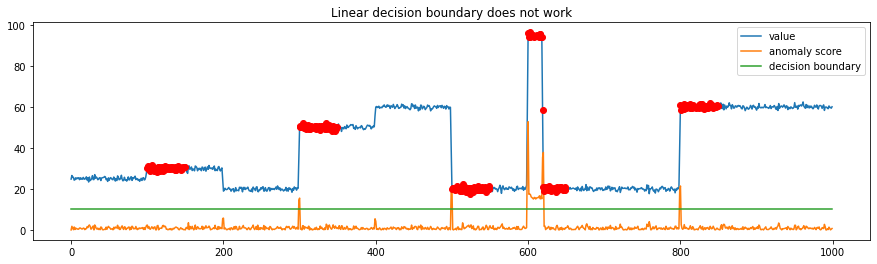

In [7]:
plt.figure(figsize=(15,4))
plt.plot(t,y,label ='value');
plt.plot(t,anom_score,label ='anomaly score')
plt.plot(t,10*np.ones(np.shape(t)),label ='decision boundary')
plt.plot(anom_ind,y[anom_ind],'ro')
plt.title('Linear decision boundary does not work')
plt.legend()
#plt.show()
plt.savefig('doesnt_work.jpg')

### 7. It works for the second labeler.
Because linear boundary is easy to learn, our binary classifier catches it perfectly. 

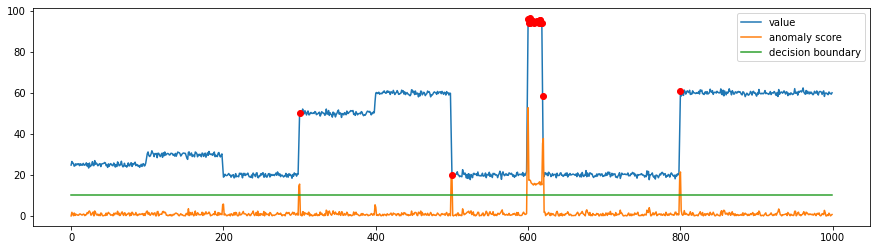

In [8]:
df1 = pd.read_csv("Ex1b.csv");

labels = df1['is_anom'].to_numpy();labels=labels.reshape(np.size(labels),1);
anom_ind=np.nonzero(labels)[0]
    
plt.figure(figsize=(15,4))
plt.plot(t,y,label ='value');
plt.plot(t,anom_score,label ='anomaly score')
plt.plot(t,10*np.ones(np.shape(t)),label ='decision boundary')
plt.plot(anom_ind,y[anom_ind],'ro')
#plt.title('Linear decision boundary works')
#plt.title('Linear decision boundary works')
plt.legend()
#plt.show()
plt.savefig('works.jpg')

This could be one possible explanation. We would be happy to hear something different from you guys :)